# Module 6 - Clustering for Diverse portfolio analysis

   ### Welcome to the Answer notebook for Module 6 ! 
Make sure that you've submitted the module 5 notebook and unlocked Module 6 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans

In [2]:
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
stocks=['APOLLOTYRE.csv','ASIANPAINT.csv','AXISBANK.csv','BAJAJELEC.csv','BERGEPAINT.csv','CASTROLIND.csv','CIPLA.csv',
        'DHFL.csv','FORTIS.csv','GODREJIND.csv','HDFC.csv','HINDUNILVR.csv','IDFC.csv','IGL.csv','ITC.csv','JKLAKSHMI.csv','JUBLFOOD.csv',
        'LALPATHLAB.csv','LT.csv','LUXIND.csv','M&M.csv','MARUTI.csv','MUTHOOTFIN.csv','PNB.csv','PVR.csv','RAYMOND.csv','TITAN.csv','VENKEYS.csv','VIPIND.csv','VOLTAS.csv']

In [4]:
df_array=[] #list of all the dfs beign loaded
price_df=pd.DataFrame() #dataframe of Close price of each value
for stock in stocks:
    df_array.append(pd.read_csv(stock))
    price_df[stock[0:-4]]=[]
for i in range(len(df_array)):
    df_array[i]=df_array[i][df_array[i]['Series']=='EQ']
    df_array[i].reset_index(drop=True,inplace=True)
    price_df[stocks[i][0:-4]]=df_array[i]['Close Price'].pct_change()
price_df.dropna(inplace=True)
price_df.reset_index(drop=True,inplace=True)   

### Query 6.2 
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [5]:
names=price_df.columns.values
values=np.array([[0.0,0.0] for x in range(len(names))])
for i in range(len(names)):
        ret=np.sum(price_df[names[i]].values)/len(price_df)
        vol=np.sqrt(np.sum([(x-ret)**2 for x in price_df[names[i]].values])/len(price_df))
        values[i]=[252*ret,np.sqrt(252)*vol]

### Query 6.3 
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering.
Identify the optimum number of clusters using the Elbow curve method


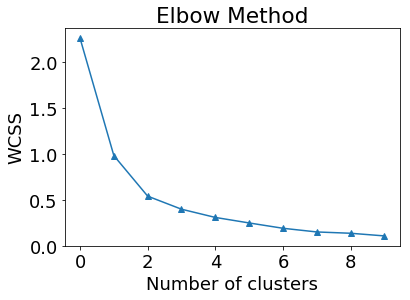

In [6]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++').fit(values)
    wcss.append(kmeans.inertia_)
plt.plot( wcss,'^-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

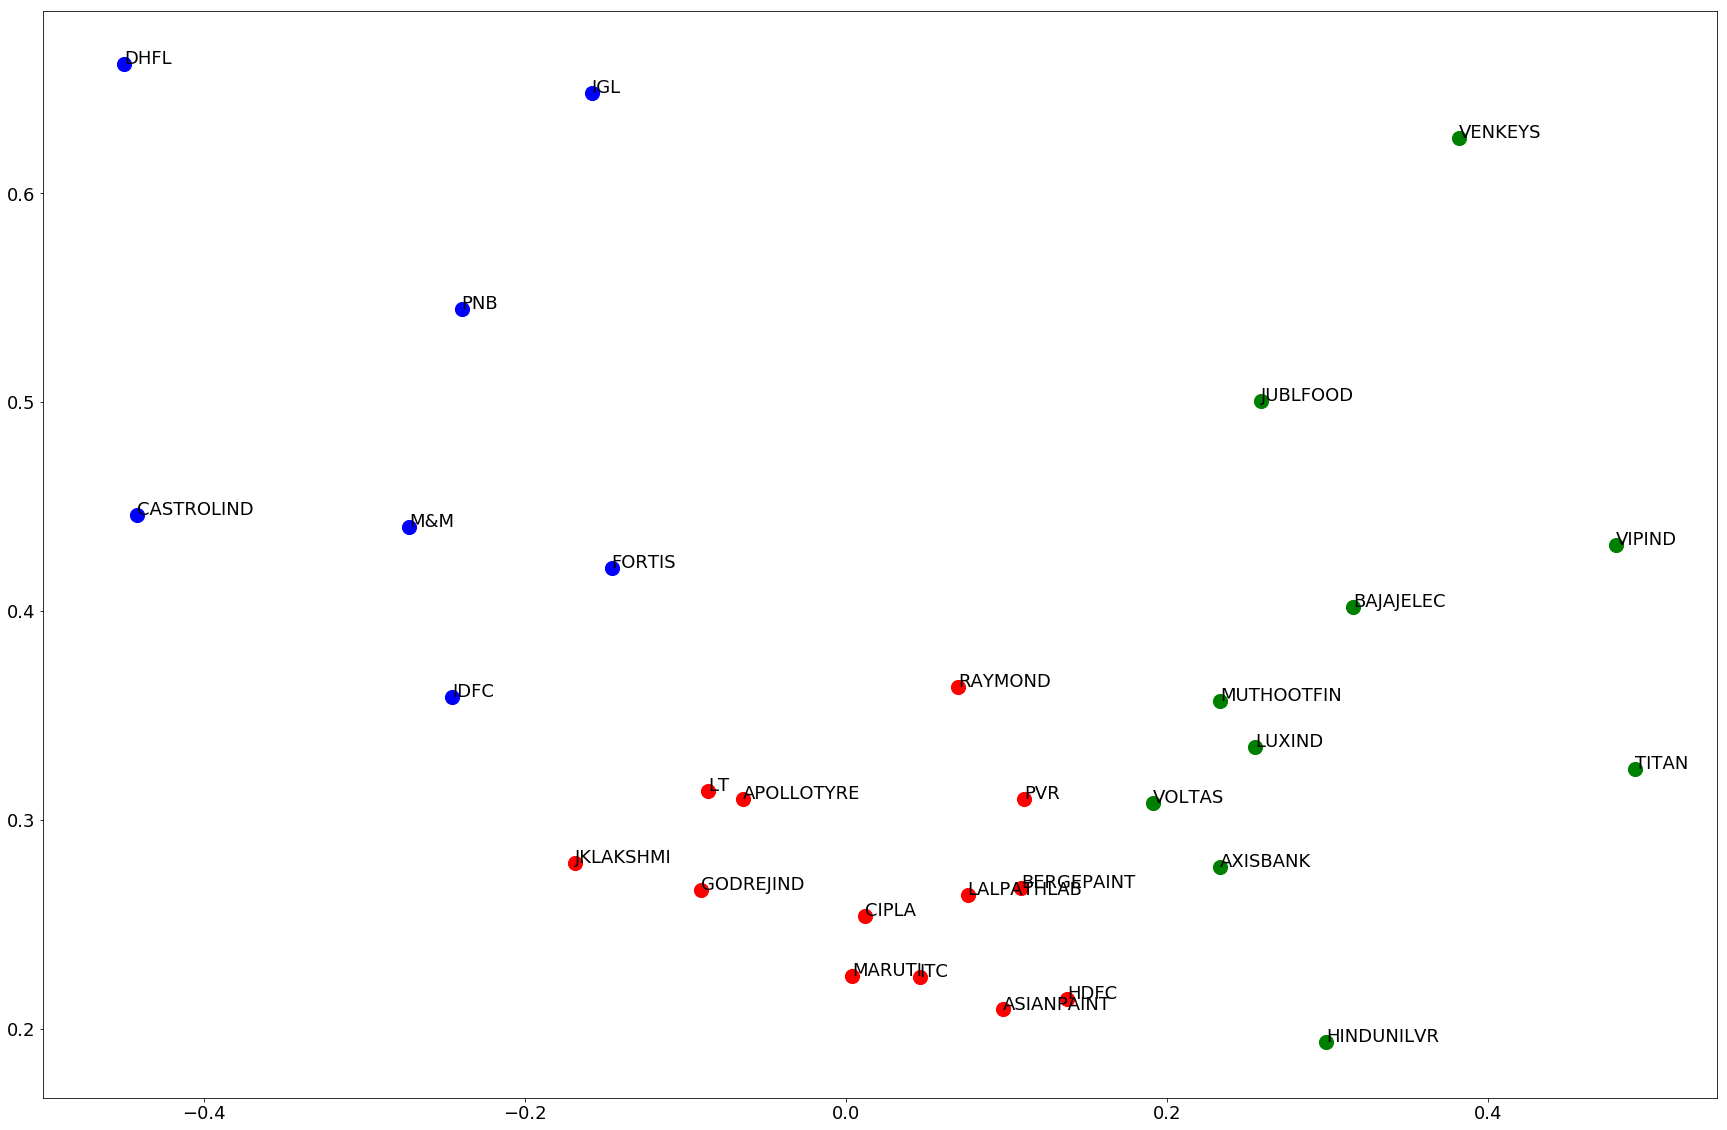

In [7]:
kmeans=KMeans(n_clusters=3,init='k-means++')
clusters=kmeans.fit_predict(values)
colors=['Red','Green','Blue']
fig1,ax1=plt.subplots(figsize=(30,20))
for i in range(len(clusters)):
    ax1.scatter(values[i,0],values[i,1],c=colors[kmeans.labels_[i]],s=200)
    ax1.annotate(stocks[i][0:-4],(values[i,0],values[i,1]))

### Query 6.4
Prepare a seprate dataframe to show which stocks belong to the same cluster

In [8]:
cluster_df=pd.DataFrame(columns=('Stock','Cluster'))
for i in range(len(clusters)):
    cluster_df.loc[i,'Stock']=stocks[i][0:-4]
    cluster_df.loc[i,'Cluster']=kmeans.labels_[i]
cluster_df=cluster_df.sort_values(['Cluster','Stock'])
cluster_df.reset_index(drop=True,inplace=True)


In [9]:
cluster_df.to_csv('Stock-Clusters.csv')